In [1]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = ert.load('Ex5_SC_pg.dat')
print(data)

Data: Sensors: 50 data: 392, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fe0989b0590>)

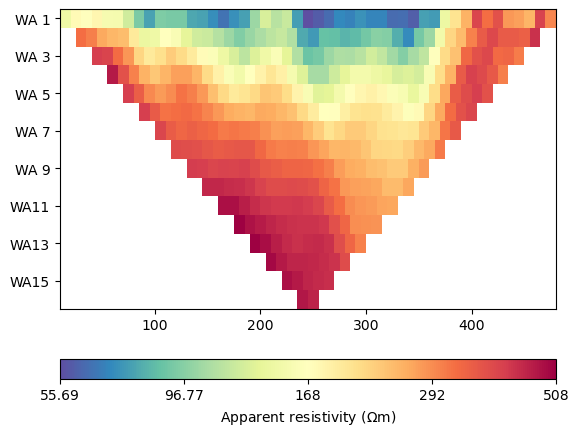

In [3]:
ert.show(data)

In [4]:
#data.estimateError()
#data.remove(data['rhoa'] < 0)
data.estimateError()
mgr = ert.Manager(data)
mgr.invert(paraDepth=150, zWeight=0.5, verbose=True)

29/10/25 - 00:24:55 - pyGIMLi - INFO - Cache /home/jyotirmp/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 2): /home/jyotirmp/.cache/pygimli/10214738164656577555
29/10/25 - 00:24:55 - pyGIMLi - INFO - Found 2 regions.
29/10/25 - 00:24:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/10/25 - 00:24:55 - pyGIMLi - INFO - Found 2 regions.
29/10/25 - 00:24:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/10/25 - 00:24:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
29/10/25 - 00:24:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
29/10/25 - 00:24:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2271 Cells: 4256 Boundaries: 3334
29/10/25 - 00:24:55 - pyGIMLi - INFO - Use median(data values)=254.49
29/10/25 - 00:24:55 - pyGIMLi - INFO - Created startmodel from forward operator:803, min/max=254.4900

Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  1

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  2

Statistics:

  Input vertices: 107
  Input segments: 108
  Input holes: 0

  Mesh vertices: 604
  Mesh triangles: 1064
  Mesh edges: 1667
  Mesh exterior boundary edges: 142
  Mesh interior boundary edges: 23
  Mesh subsegments (constrained edges): 165

min/max(dweight) = 33.3333/33.3333
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7fe09084a070>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bou

803 [61.641512126086056,...,1465.6675410994465]

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x7fe08ea384d0>)

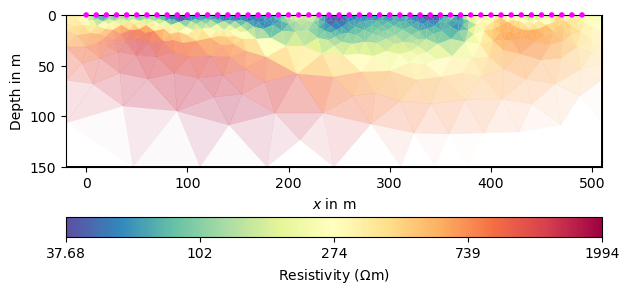

In [5]:
mgr.showResult()

In [6]:
#xz = np.loadtxt('xzStruct.txt')
xz = pg.getExampleData("ert/struct.txt")


29/10/25 - 00:25:07 - pyGIMLi - INFO - Looking for ert/struct.txt in gimli-org/example-data/


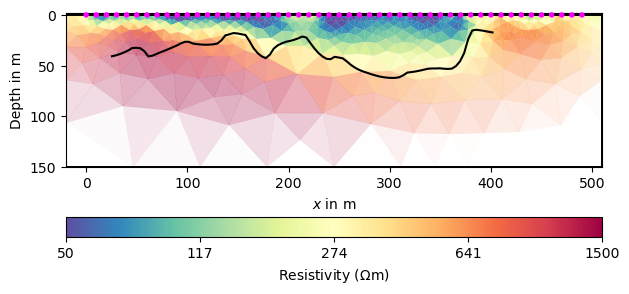

In [7]:
ax, cb = mgr.showResult(cMin=50, cMax=1500)
ax.plot(xz[:, 0], xz[:, 1], "k-")

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x7fe08fc8c850>)

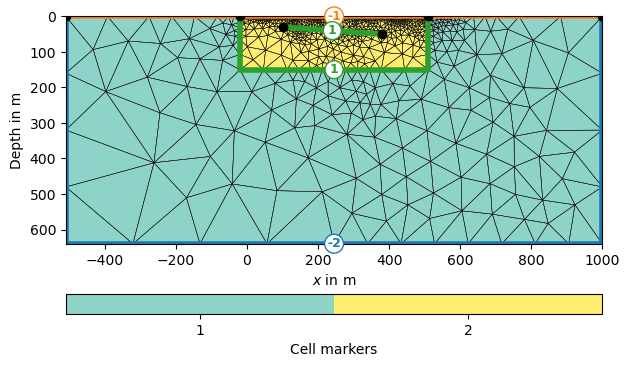

In [11]:
plc = mt.createParaMeshPLC(data, paraDepth=150, boundary=1)
#line = mt.createPolygon(xz, marker=1)
line = mt.createLine([100, -30], [380, -50])
plc += line
mesh = mt.createMesh(plc, quality=34.3)
pg.show(mesh, markers=True, showMesh=True)

In [12]:
mgr = ert.ERTManager(data)
mgr.setMesh(mesh)
mgr.invert(verbose=True)

29/10/25 - 00:36:45 - pyGIMLi - INFO - Found 2 regions.
29/10/25 - 00:36:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/10/25 - 00:36:45 - pyGIMLi - INFO - Creating forward mesh from region infos.
29/10/25 - 00:36:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
29/10/25 - 00:36:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3055 Cells: 5816 Boundaries: 4508
29/10/25 - 00:36:45 - pyGIMLi - INFO - Use median(data values)=254.49
29/10/25 - 00:36:45 - pyGIMLi - INFO - Created startmodel from forward operator:1095, min/max=254.490000/254.490000
29/10/25 - 00:36:45 - pyGIMLi - INFO - Starting inversion.


min/max(dweight) = 33.3333/33.3333
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7fe08dff31a0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 55.69/508
min/max (error): 3%/3%
min/max (start model): 254/254
--------------------------------------------------------------------------------
Calculating response for model: min = 254.49 max = 254.49
Allocating memory for primary potential...... 0.00719153

No primary potential for secondary field calculation. Calculating analytically...
Forward: time: 0.732871s
Response: min = 254.132 max = 254.512 mean = 254.378
Reciprocity rms(modelReciprocity) 0%, max: 0%
min/max(dweight) = 33.3333/33.3333
Building constraints matrix
constraint matrix of size(nBounds x nModel) 1578 x 1095
check Jacobian: wrong dimensions: (0x0) should be (392x1095)  force: 1
jacobian size invalid, forced recalc: 1
Calculating Jacobian matrix (forced=1)...Using exi

1095 [2254.127416980957,...,2033.3435559690517]

sens sum: median = 1.82086 min = 1.00109 max = 3.08563
... 1.14579 s
solve CGLSCDWWtrans with lambda = 20
Calculating response for model: min = 38.1876 max = 2428.49
Using existing primary potentials.
Forward: time: 0.530534s
Response: min = 57.8909 max = 546.451 mean = 263.347
Reciprocity rms(modelReciprocity) 0.443534%, max: 2.69902%
5: LS newModel: min = 38.1876; max = 2428.49
5: LS newResponse: min = 57.4637; max = 545.869
5: rms/rrms(data, LS newResponse) = 12.8283/3.84125%
5: chi^2(data, LS newResponse, error, log) = 1.5613
5: Phi = 612.029+30.8014*20=1228.06
Performing line search with tau = 0.6
Calculating response for model: min = 37.9468 max = 2351.2
Using existing primary potentials.
Forward: time: 0.662134s
Response: min = 57.8922 max = 519.604 mean = 256.414
Reciprocity rms(modelReciprocity) 0.445959%, max: 2.67923%
5: Model: min = 37.9468; max = 2351.2
5: Response: min = 57.4647; max = 519.074
5: rms/rrms(data, Response) = 5.79676/2.4883%
5: chi^2(data, Response, error, l

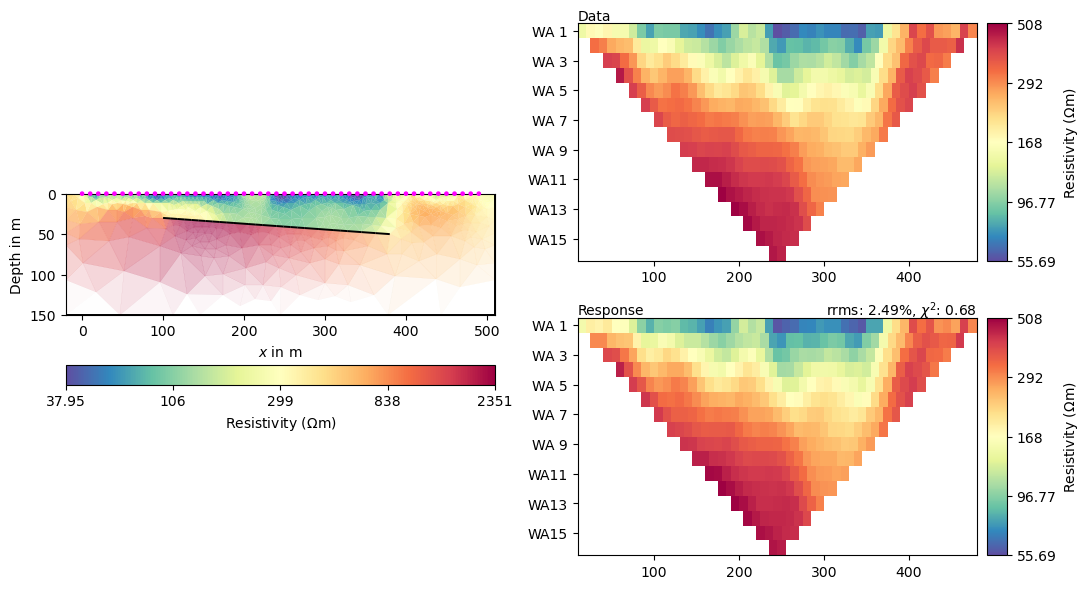

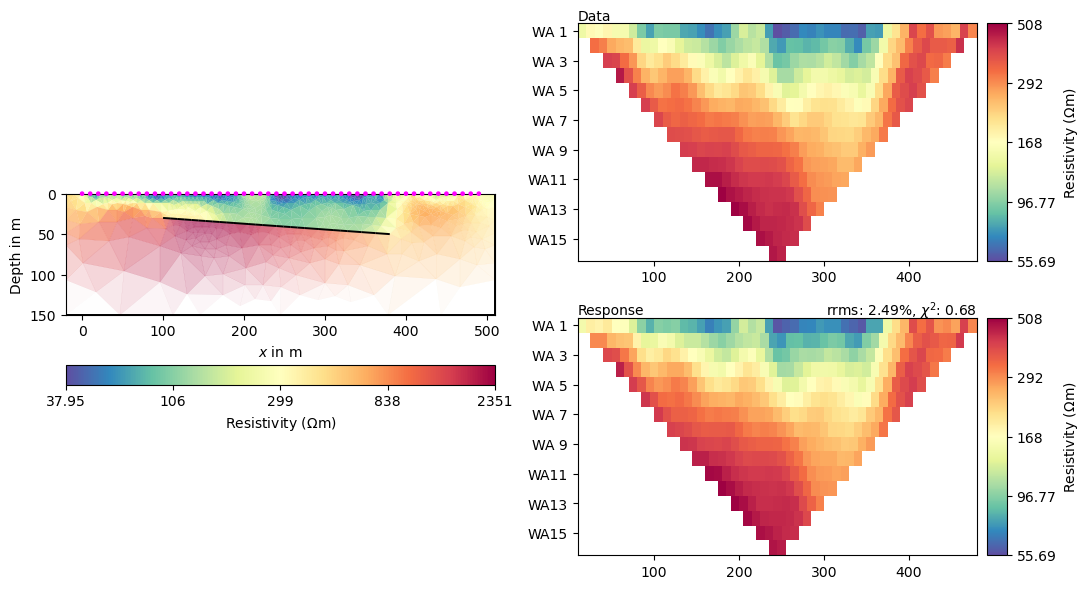

In [14]:
mgr.showResultAndFit()